In [60]:
import cv2
import numpy as np

import glob
import matplotlib.pyplot as plt
import os
from pathlib import Path

import matplotlib.ticker as ticker



In [67]:
def increase_brightness(img, value=60):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def decrease_brightness(img, value=15):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = value
    v[v < lim] = 0
    v[v >= lim] -= value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def checkMeanLuminance(path):
    img = cv2.imread(path) 
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return np.mean(hsv[:,:,2])

In [74]:
def highpass(img, sigma):
    return img - cv2.GaussianBlur(img, (0,0), sigma) + 127

# Encoding stimuli

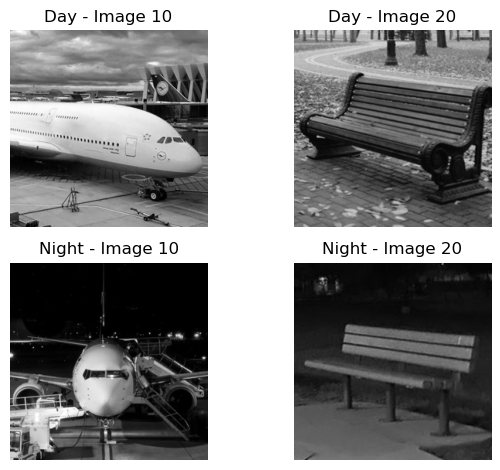

In [68]:
BASE_PATH_unadjusted = Path('./stimuli/encoding_stim_grayscaled/')

pathDay = list(BASE_PATH_unadjusted.glob('*day*'))
pathNight = list(BASE_PATH_unadjusted.glob('*night*'))


# Day images (top row)
plt.subplot(2, 2, 1)
img = cv2.imread(str(pathDay[10]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Day - Image 10')
plt.axis('off')

plt.subplot(2, 2, 2)
img = cv2.imread(str(pathDay[20]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Day - Image 20')
plt.axis('off')

# Night images (bottom row)
plt.subplot(2, 2, 3)
img = cv2.imread(str(pathNight[10]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Night - Image 10')
plt.axis('off')

plt.subplot(2, 2, 4)
img = cv2.imread(str(pathNight[20]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Night - Image 20')
plt.axis('off')

plt.tight_layout()
plt.show()

In [69]:
checkMeanLuminance(pathDay[2]),checkMeanLuminance(pathNight[30]),

(121.24192810058594, 75.77940368652344)

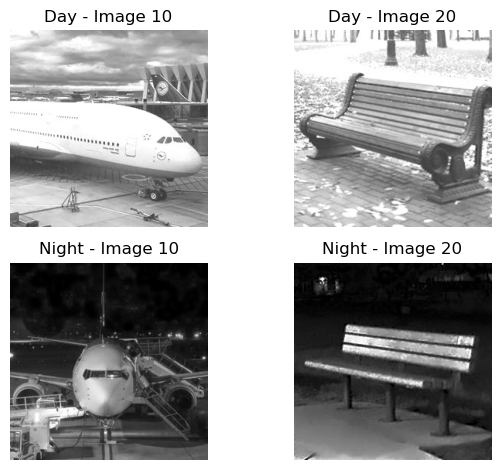

In [58]:
BASE_PATH = Path('./stimuli/encoding_stim_grayscaled_brightness_adjusted/')


pathDay = list(BASE_PATH.glob('*day*'))
pathNight = list(BASE_PATH.glob('*night*'))

# Day images (top row)
plt.subplot(2, 2, 1)
img = cv2.imread(str(pathDay[10]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Day - Image 10')
plt.axis('off')

plt.subplot(2, 2, 2)
img = cv2.imread(str(pathDay[20]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Day - Image 20')
plt.axis('off')

# Night images (bottom row)
plt.subplot(2, 2, 3)
img = cv2.imread(str(pathNight[10]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Night - Image 10')
plt.axis('off')

plt.subplot(2, 2, 4)
img = cv2.imread(str(pathNight[20]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Night - Image 20')
plt.axis('off')

plt.tight_layout()
plt.show()

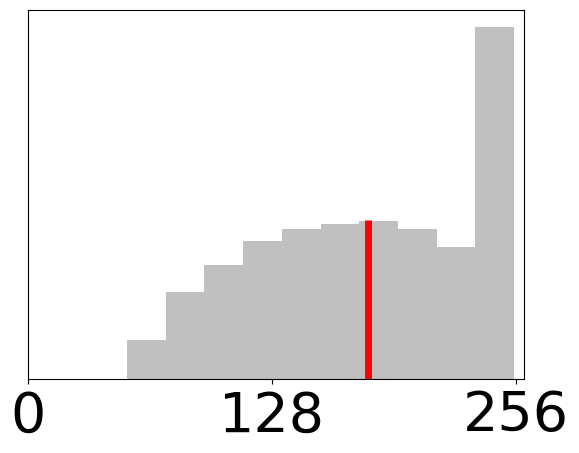

In [61]:
fig,ax = plt.subplots()

img = cv2.imread(pathDay[10]) 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.hist(np.ravel(hsv[:,:,2]),color='silver')
plt.vlines(np.mean(np.ravel(hsv[:,:,2])),0,7050,linewidth = 5,color='red')

plt.xlim(0,260)
plt.tick_params(labelsize = 40)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(128))

ax.yaxis.set_visible(False)

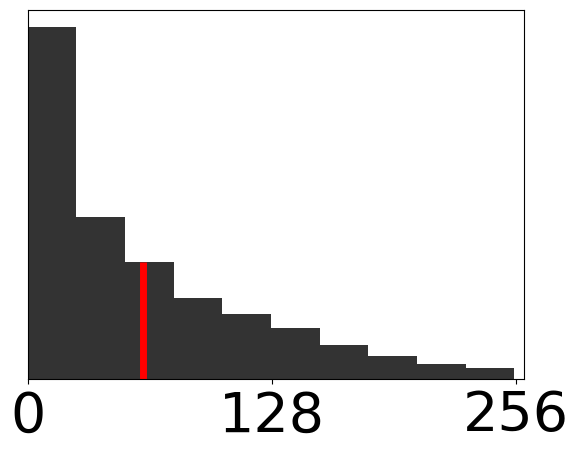

In [62]:
fig,ax = plt.subplots()

img2 = cv2.imread(pathNight[5]) 
hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

plt.hist(np.ravel(hsv2[:,:,2]),color='black',alpha = 0.8)
plt.vlines(np.mean(np.ravel(hsv2[:,:,2])),0,8400,linewidth = 5,color='red')

plt.xlim(0,260)
plt.tick_params(labelsize = 40)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(128))

ax.yaxis.set_visible(False)

In [63]:
checkMeanLuminance(pathDay[2]),checkMeanLuminance(pathNight[30]),

(178.53713989257812, 60.61509704589844)

# probe (highpass filtering)

In [75]:
BASE_PATH_unadjusted = Path('./stimuli/encoding_stim_grayscaled/')

pathDay = list(BASE_PATH_unadjusted.glob('*day*'))
pathNight = list(BASE_PATH_unadjusted.glob('*night*'))


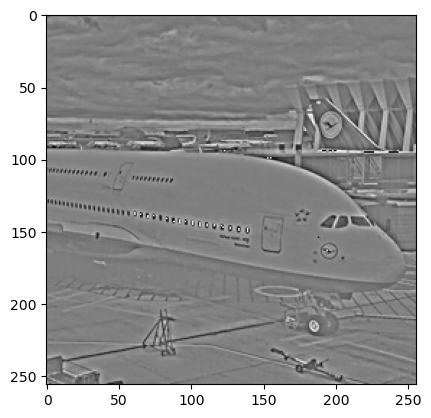

In [76]:

imageEg = cv2.imread(pathDay[10])
img_gray = cv2.cvtColor(cv2.resize(imageEg,(256,256)), cv2.COLOR_BGR2GRAY)
img = highpass(img_gray, 2.5)
plt.imshow(img,cmap='gray')

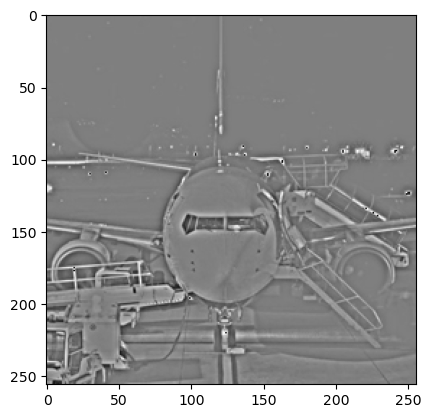

In [77]:
imageEg = cv2.imread(pathNight[10])
img_gray = cv2.cvtColor(cv2.resize(imageEg,(256,256)), cv2.COLOR_BGR2GRAY)
img = highpass(img_gray, 2.5)
plt.imshow(img,cmap='gray')